### Score: `[31]`

Q1. `[11]` good job。

Q2. `[20]` please use different project

1. Global Earthquakes
In this problem set, we will use this file from the USGS Earthquakes Database. The dataset is similar to the one you use in Assignment 02. Use the file provided (usgs_earthquakes.csv) to recreate the following map. Use the mag column for magnitude. [10 points]

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import scipy
from scipy.spatial import cKDTree

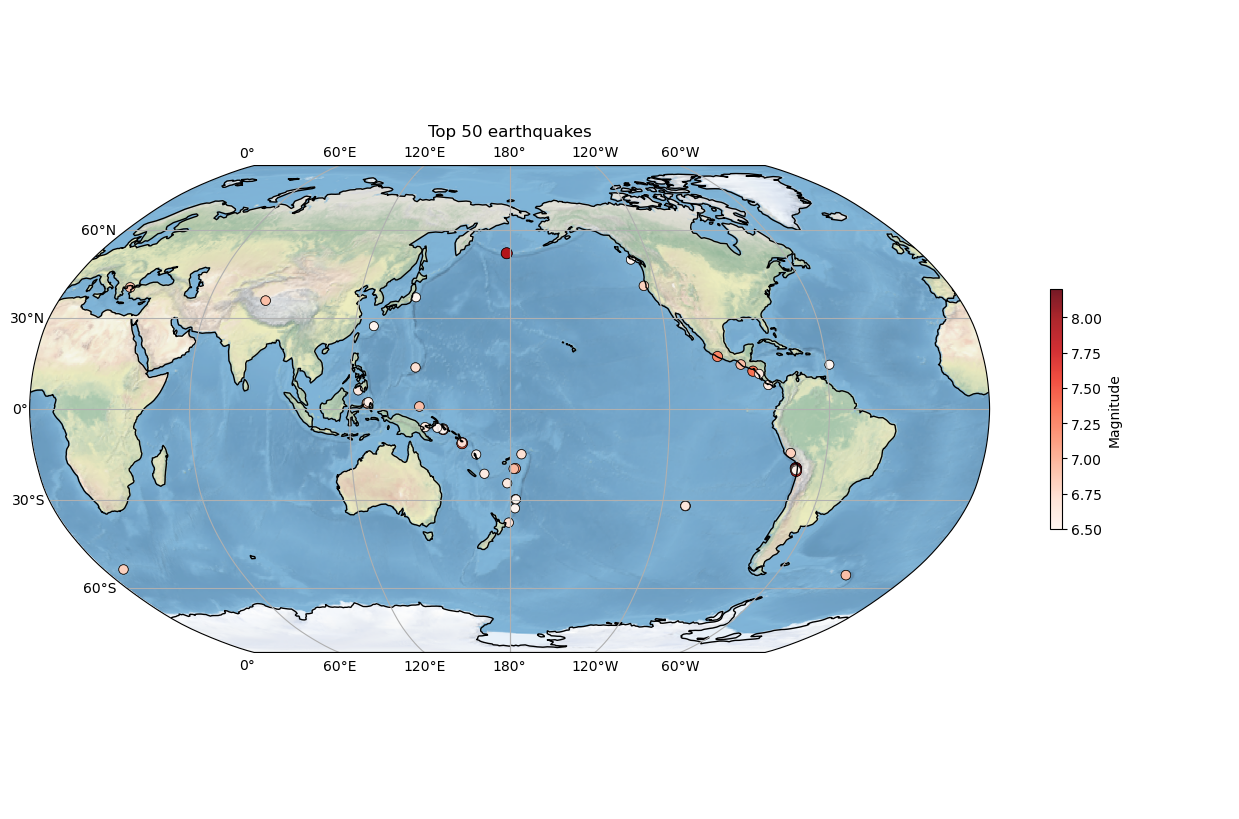

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

#加载数据集
df = pd.read_csv('usgs_earthquakes.csv')

# 按照地震强度mag来对数据进行排列 并取前50
df_sorted = df.sort_values(by='mag', ascending=False).head(50)

# 创建绘图
fig, ax = plt.subplots(figsize=(12, 8), frameon=False)
# 去除坐标轴框和标签
ax.set_frame_on(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('')
ax.set_ylabel('')
# 使用Robinson投影并将180°作为中间经度来对应图片要求
ax = plt.axes(projection=ccrs.Robinson(central_longitude=180))
ax.set_global()

# 根据位置绘制点
ax.scatter(df_sorted['longitude'], df_sorted['latitude'], c=df_sorted['mag'], cmap='Reds', s=(df_sorted['mag'] ** 2) , alpha=0.9, edgecolors='black',linewidth=0.5,transform=ccrs.PlateCarree())

# 添加网格和海岸线
ax.coastlines()
ax.gridlines(draw_labels=True)
# 添加地形背景
ax.stock_img()  # 添加地球表面的背景（蓝色海洋和陆地地形）

# 设置标题
ax.set_title('Top 50 earthquakes')

#添加颜色条
scatter = ax.scatter(df_sorted['longitude'], df_sorted['latitude'], c=df_sorted['mag'], cmap='Reds', s=(df_sorted['mag'] ** 2) , alpha=0.9,edgecolors='black',linewidth=0.5, transform=ccrs.PlateCarree())
cbar = plt.colorbar(scatter, ax=ax, orientation='vertical', pad=0.05,shrink=0.3)
cbar.set_label('Magnitude')

# 调整图像布局，确保没有空白区域
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

#绘图
plt.show()


总结：我设置了点的颜色和大小都随mag的大小变化而变化，不过有点不明显。

2. Explore a netCDF dataset
Browse the NASA’s Goddard Earth Sciences Data and Information Services Center (GES DISC) website. Search and download a dataset you are interested in. You are also welcome to use data from your group in this problem set. But the dataset should be in netCDF format. For this problem set, you are welcome to use the same dataset you used in Assignment 03.

一开始在NASA的网站里下载了全球温度和降水数据，但是全球的差异不大，图画出来不那么好看（而且大气温度是分层的），最后下载了这个了全球土壤湿度数据，土壤湿度数据的空间异质性比较强，画图比较好看（），这是数据的链接，请查收~
https://send.cra.moe/file/eNu0wd8u7CPjAPwH/Ft4UCiAzbD4yNfOb/GLDAS_CLSM025_DA1_D.A20240630.022.nc4

In [5]:
from netCDF4 import Dataset
 # 打开第一个文件，查看它的时间维度
ds1 = Dataset('GLDAS_CLSM025_DA1_D.A20240630.022.nc4')
 # 打印所有变量
print(ds1.variables.keys())

dict_keys(['lat', 'lon', 'time', 'time_bnds', 'Swnet_tavg', 'Lwnet_tavg', 'Qle_tavg', 'Qh_tavg', 'Qg_tavg', 'Evap_tavg', 'Qs_tavg', 'Qsb_tavg', 'Qsm_tavg', 'SnowT_tavg', 'AvgSurfT_tavg', 'SWE_tavg', 'SnowDepth_tavg', 'SoilMoist_S_tavg', 'SoilMoist_RZ_tavg', 'SoilMoist_P_tavg', 'ECanop_tavg', 'TVeg_tavg', 'ESoil_tavg', 'CanopInt_tavg', 'EvapSnow_tavg', 'ACond_tavg', 'TWS_tavg', 'GWS_tavg'])


2.1 [10 points] Make a global map of a certain variable. Your figure should contain: a project, x label and ticks, y label and ticks, title, gridlines, legend, colorbar, masks or features, annotations, and text box (1 point each).

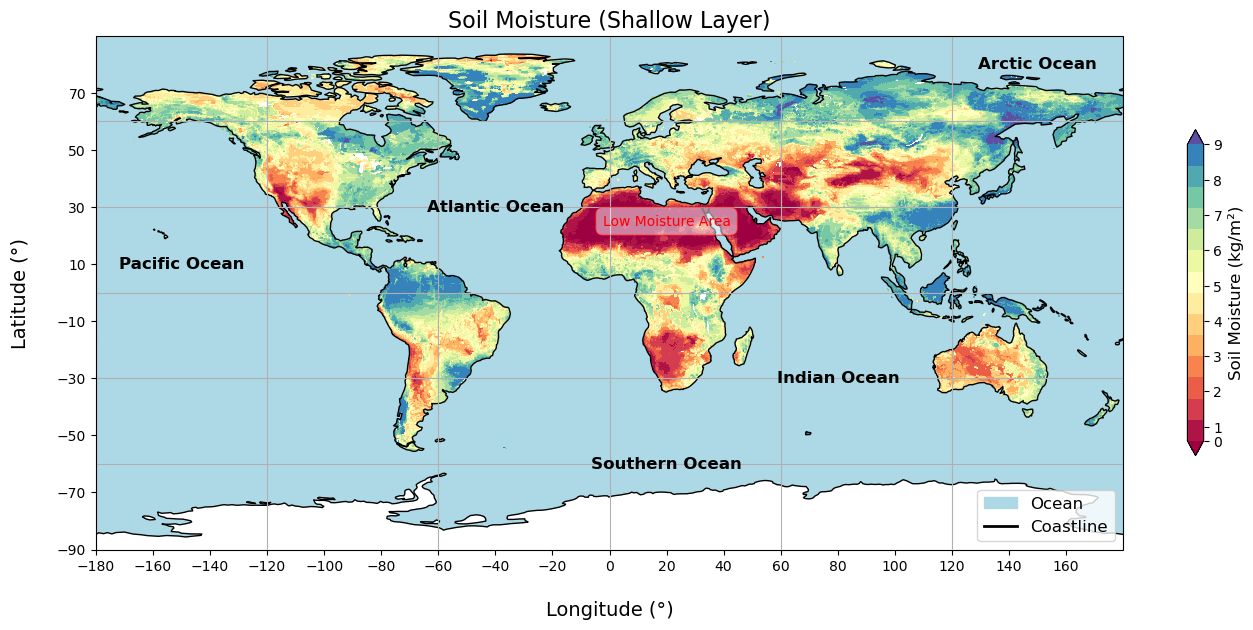

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

# 打开数据集
variable = 'SoilMoist_S_tavg' 
data = xr.open_dataset('GLDAS_CLSM025_DA1_D.A20240630.022.nc4', decode_times=False) 
U = data[variable].squeeze()

# 获取纬度和经度数据
lat = data['lat']
lon = data['lon']

# 创建图形 (设置大小)
plt.figure(figsize=(14, 7))

# 使用 PlateCarree 投影
projection = ccrs.PlateCarree()
ax = plt.axes(projection=projection)

# 设置全局地图并绘制海岸线
ax.set_global()
ax.coastlines()

# 为海洋区域添加颜色
ax.add_feature(cfeature.OCEAN, facecolor='lightblue') 

# 使用默认的 Spectral 调色板
newcmp = plt.colormaps['Spectral'] 

# 创建二维经纬度网格
lon2d, lat2d = np.meshgrid(lon, lat)

# 使用 contourf 绘制填充等高线
p = ax.contourf(lon2d, lat2d, U, 40, vmax=np.max(U), levels=16, cmap=newcmp, extend='both')

# 添加横向 colorbar
cbar = plt.colorbar(p, orientation='vertical', shrink=0.5, pad=0.05)
cbar.ax.tick_params(labelsize=10)
cbar.set_ticks(np.linspace(0, 9, 10))  
cbar.set_label('Soil Moisture (kg/m²)', fontsize=12) 

# 添加网格线
ax.gridlines(draw_labels=False)

# 为大洋添加标注
ax.text(-150, 10, 'Pacific Ocean', fontsize=12, color='black', ha='center', va='center', weight='bold')
ax.text(-40, 30, 'Atlantic Ocean', fontsize=12, color='black', ha='center', va='center', weight='bold')
ax.text(80, -30, 'Indian Ocean', fontsize=12, color='black', ha='center', va='center', weight='bold')
ax.text(150, 80, 'Arctic Ocean', fontsize=12, color='black', ha='center', va='center', weight='bold')
ax.text(20, -60, 'Southern Ocean', fontsize=12, color='black', ha='center', va='center', weight='bold')

# 添加文本框（例如，标记土壤湿度较低的区域）
ax.text(20, 25, 'Low Moisture Area', fontsize=10, color='red', ha='center', va='center', bbox=dict(facecolor='white', alpha=0.5, edgecolor='red', boxstyle='round,pad=0.5'))

# 添加标题
ax.set_title('Soil Moisture (Shallow Layer)', fontsize=16)

# 设置 x 和 y 轴刻度
ax.set_xticks(np.arange(-180, 180, 20)) 
ax.set_yticks(np.arange(-90, 90,20)) 

# 设置 x 和 y 轴标签，并确保不被遮挡
ax.set_xlabel('Longitude (°)', fontsize=14, labelpad=20)  # 设置标签和间距
ax.set_ylabel('Latitude (°)', fontsize=14, labelpad=20)
# 添加图例
legend_ocean = mpatches.Patch(color='lightblue', label='Ocean')  
coastline_legend = Line2D([0], [0], color='black', lw=2, label='Coastline')  

# 添加两个图例元素到同一个位置
ax.legend(handles=[legend_ocean, coastline_legend], loc='lower right', fontsize=12)
plt.tight_layout()
# 显示图像
plt.subplots_adjust()
plt.show()


2.2 [10 points] Make a regional map of the same variable. Your figure should contain: a different project, x label and ticks, y label and ticks, title, gridlines, legend, colorbar, masks or features, annotations, and text box (1 point each).

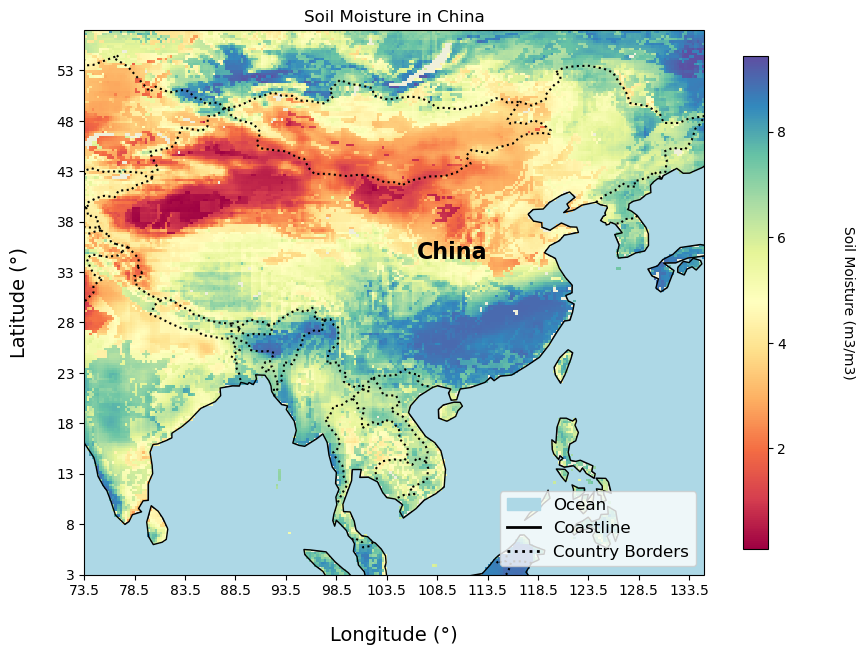

In [4]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches

# 打开数据集
variable = 'SoilMoist_S_tavg' 
data = xr.open_dataset('GLDAS_CLSM025_DA1_D.A20240630.022.nc4', decode_times=False) 
U = data[variable].squeeze()

# 获取纬度和经度数据
lat = data['lat'].values
lon = data['lon'].values

# 提取中国范围的经纬度数据
lat_min, lat_max = 3, 57.0  # 中国的纬度范围
lon_min, lon_max = 73.5, 135.0  # 中国的经度范围

# 裁剪数据
U_china = U.sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max))

# 创建地图
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

# 添加海岸线和背景
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth =1.5)
ax.add_feature(cfeature.LAND, edgecolor='black')

# 绘制热图
c = ax.pcolormesh(U_china['lon'], U_china['lat'], U_china, cmap='Spectral', shading='auto')

# 添加颜色条
cbar = plt.colorbar(c, ax=ax, orientation='vertical', shrink=0.8)
cbar.set_label('Soil Moisture (m3/m3)', rotation=270, labelpad=50)

# 添加标题
ax.set_title('Soil Moisture in China')

# 为海洋区域添加颜色
ax.add_feature(cfeature.OCEAN, facecolor='lightblue') 

# 添加文本注释
ax.text(110, 35, 'China', fontsize=16, color='black', ha='center', va='center', weight='bold')

# 添加图例
legend_ocean = mpatches.Patch(color='lightblue', label='Ocean')  
coastline_legend = Line2D([0], [0], color='black', lw=2, label='Coastline')  
border_patch = Line2D([0], [0], color='black', linestyle=':', lw=2, label='Country Borders')
ax.legend(handles=[legend_ocean, coastline_legend, border_patch], loc='lower right', fontsize=12)

# 设置 x 和 y 轴刻度
ax.set_xticks(np.arange(lon_min, lon_max, 5)) 
ax.set_yticks(np.arange(lat_min, lat_max, 5)) 

# 设置 x 和 y 轴标签，并确保不被遮挡
ax.set_xlabel('Longitude (°)', fontsize=14, labelpad=20)  # 设置标签和间距
ax.set_ylabel('Latitude (°)', fontsize=14, labelpad=20)

# 显示图像
plt.show()


上图是选择中国即周边范围作为绘制区域